# Class 4: Unsupervised Learning

### Agenda
1. Supervised vs Unsupervised Learning
2. Clustering
    - k-means
    - Hierarchical clustering
    - Metrics for clustering quality
    - Clustering characterization
3. Dimensionality Reduction
    - PCA

## 0. Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

np.random.seed(0)

## 1. Supervised vs Unsupervised Learning

### Supervised Learning

In supervised learning, the model is trained on a labeled dataset, which means that each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs that can be used to predict the labels of new, unseen data. 

**Key Characteristics:**
- **Labeled Data:** Training data includes input-output pairs.
- **Goal:** Predict the output (label) for new inputs.
- **Types of Problems:** Classification (e.g., disease prediction) and regression (e.g., medical costs).

**Example in Healthcare:**

Predicting whether a patient has a heart disease based on features like blood pressure and cholesterol levels. The training data would include many patients' records with known outcomes (i.e., whether they have heart disease or not).

Synthetic dataset

In [2]:
# Features: cholesterol levels and age
num_samples = 200

cholesterol = np.concatenate([np.random.normal(180, 20, num_samples // 2),
                              np.random.normal(220, 20, num_samples // 2)])
age = np.concatenate([np.random.normal(50, 5, num_samples // 2),
                      np.random.normal(60, 5, num_samples // 2)])

# Target variable: heart disease (binary)
heart_disease = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

Plot the data points

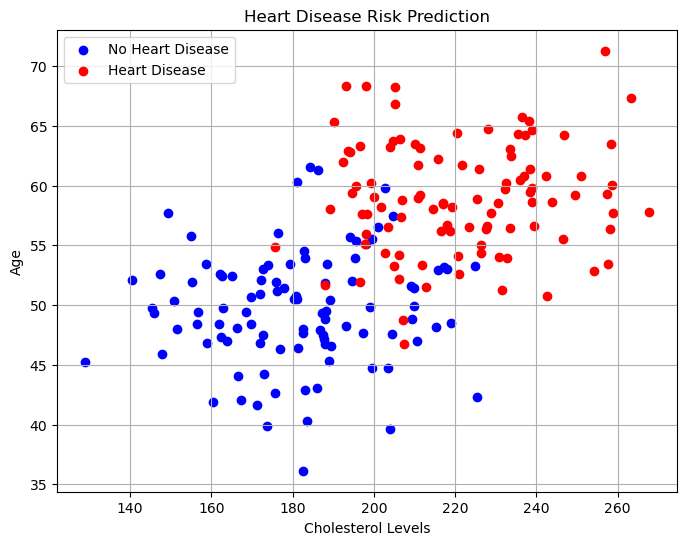

In [3]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing target variable (heart disease)
plt.scatter(cholesterol[heart_disease == 0], age[heart_disease == 0], color='blue', label='No Heart Disease')
plt.scatter(cholesterol[heart_disease == 1], age[heart_disease == 1], color='red', label='Heart Disease')

plt.xlabel('Cholesterol Levels')
plt.ylabel('Age')
plt.title('Heart Disease Risk Prediction')
plt.legend()
plt.grid(True)
plt.show()

Plot the datapoints with a decision boundary

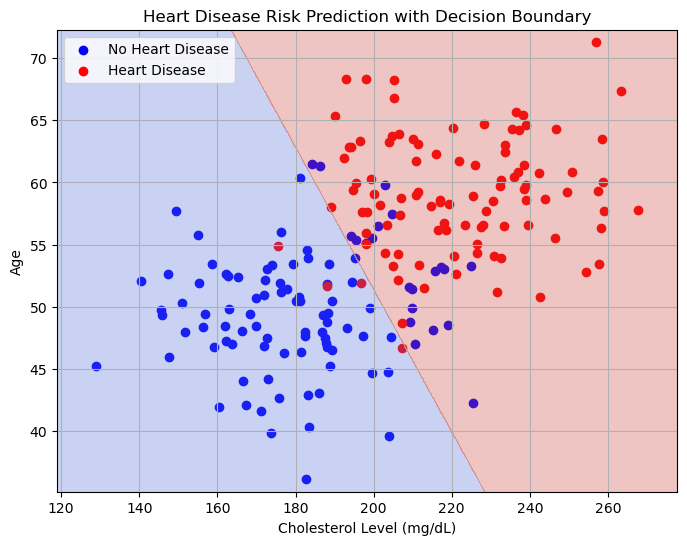

In [9]:
# Fit logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(np.vstack((cholesterol, age)).T, heart_disease)

# Plotting decision boundary
plt.figure(figsize=(8, 6))

# Plot data points with colors representing target variable (heart disease)
plt.scatter(cholesterol[heart_disease == 0], age[heart_disease == 0], color='blue', label='No Heart Disease')
plt.scatter(cholesterol[heart_disease == 1], age[heart_disease == 1], color='red', label='Heart Disease')

# Create meshgrid for decision boundary
x_min, x_max = cholesterol.min() - 10, cholesterol.max() + 10
y_min, y_max = age.min() - 1, age.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predictions on meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and color regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Age')
plt.title('Heart Disease Risk Prediction with Decision Boundary')
plt.legend()
plt.grid(True)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### Unsupervised Learning

In unsupervised learning, the model is trained on a dataset without labeled responses. The goal is to infer the natural structure present within a set of data points. 

**Key Characteristics:**
- **Unlabeled Data:** Training data does not include output labels.
- **Goal:** Discover patterns or structures in the data.
- **Types of Problems:** Clustering (e.g., grouping patients by their diagnostics) and dimensionality reduction (e.g., reducing the number of features).

**Example in Healthcare:**

Grouping patients into clusters based on similarities in their medical records (e.g., blood pressure and cholesterol levels) without prior knowledge of the patient's health conditions. This can help identify patterns that could lead to new medical insights or treatments.

Generate synthetic dataset

In [5]:
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
n_samples = 300
centers = [(110, 160), (130, 200), (150, 220), (170, 250)]
cluster_std = [5, 10, 7, 8]  # Standard deviation for each cluster

# Generate data
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

Plot the data points to explore the distribution 

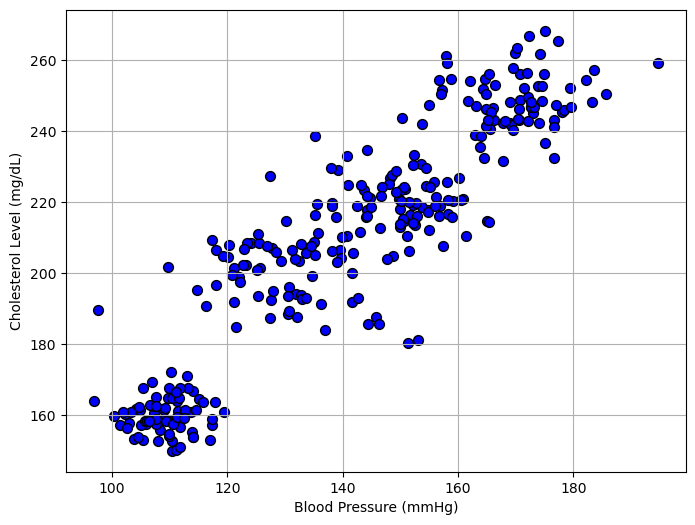

In [6]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.grid(True)
plt.show()

Apply the clustering algorithm k-means with k = 3

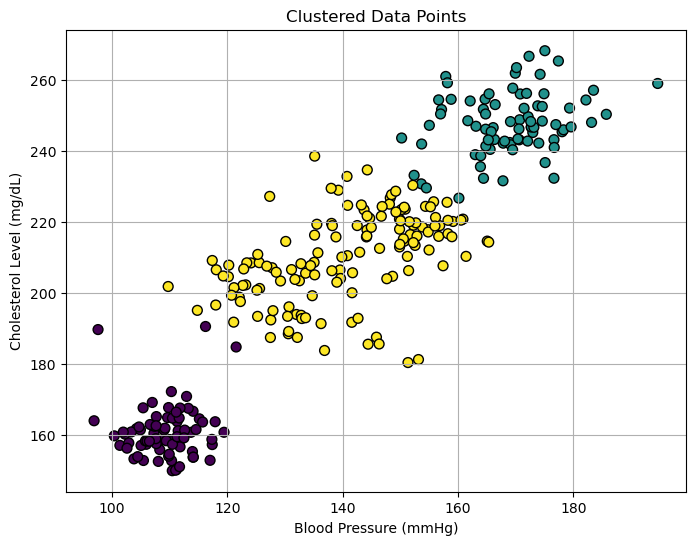

In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.title('Clustered Data Points')
plt.grid(True)
plt.show()

Apply the clustering algorithm k-means with k = 4

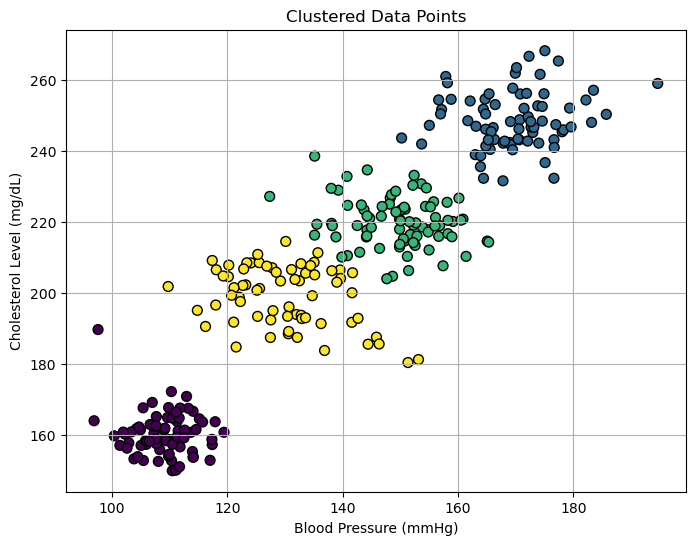

In [8]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.title('Clustered Data Points')
plt.grid(True)
plt.show()

## 2. Clustering

### K-means

### Hierarchical Clustering

### Assessing the quality of the clusters

### Cluster characterization

## 3. Dimensionality Reduction

### PCA